In [87]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

In [88]:
main_data=pd.read_csv('C:/Users/ambar/All/OnlyCodes/datasets/root_cause_analysis.csv')

from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
main_data['ROOT_CAUSE']=label_encoder.fit_transform(main_data['ROOT_CAUSE'])
np_data=main_data.to_numpy()
x_data=np_data[:,1:8]
y_data=np_data[:,8]
y_data=tf.keras.utils.to_categorical(y_data,3)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.10)

In [89]:
from tensorflow import keras
nout=3
model=tf.keras.models.Sequential()
model.add(keras.layers.Dense(128,input_shape=(7,), name='HL1', activation='relu'))
model.add(keras.layers.Dense(64,name='HL2', activation='relu'))
model.add(keras.layers.Dense(nout, name='OL', activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL1 (Dense)                 (None, 128)               1024      
                                                                 
 HL2 (Dense)                 (None, 64)                8256      
                                                                 
 OL (Dense)                  (None, 3)                 195       
                                                                 
Total params: 9475 (37.01 KB)
Trainable params: 9475 (37.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/15
6/6 [==============================] - 0s 11ms/step - loss: 0.2717 - accuracy: 0.8680 - val_loss: 0.4444 - val_accuracy: 0.8296
Epoch 2/15
6/6 [==============================] - 0s 8ms/step - loss: 0.2687 - accuracy: 0.8680 - val_loss: 0.4508 - val_accuracy: 0.8370
Epoch 3/15
6/6 [==============================] - 0s 7ms/step - loss: 0.2781 - accuracy: 0.8575 - val_loss: 0.4446 - val_accuracy: 0.8222
Epoch 4/15
6/6 [==============================] - 0s 6ms/step - loss: 0.2676 - accuracy: 0.8667 - val_loss: 0.4422 - val_accuracy: 0.8296
Epoch 5/15
6/6 [==============================] - 0s 6ms/step - loss: 0.2769 - accuracy: 0.8588 - val_loss: 0.4401 - val_accuracy: 0.8296
Epoch 6/15
6/6 [==============================] - 0s 8ms/step - loss: 0.2724 - accuracy: 0.8641 - val_loss: 0.4392 - val_accuracy: 0.8296
Epoch 7/15
6/6 [==============================] - 0s 8ms/step - loss: 0.2720 - accuracy: 0.8654 - val_loss: 0.4448 - val_accuracy: 0.8519
Epoch 8/15
6/6 [=================

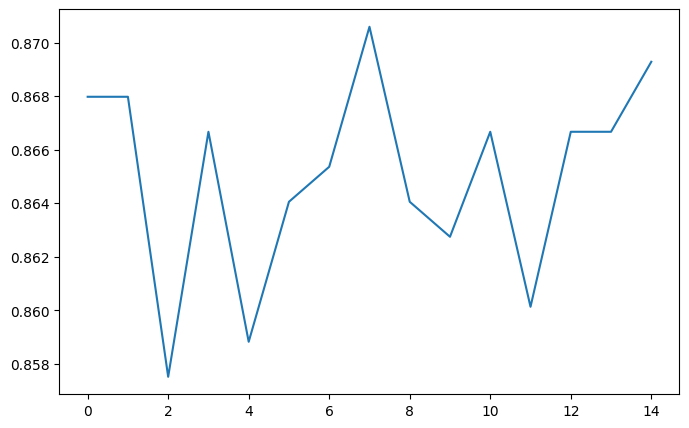

4/4 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8700


[0.4140382409095764, 0.8700000047683716]

In [109]:
import matplotlib.pyplot as plt
VERBOSE=1
BATCH_SIZE=128
EPOCHS=15
VALIDATION_SPLIT=0.15
history=model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.show()
model.evaluate(x_test,y_test)

In [110]:
model.save("error-root")

INFO:tensorflow:Assets written to: error-root\assets


INFO:tensorflow:Assets written to: error-root\assets


In [111]:
loaded_model=keras.models.load_model("error-root")
loaded_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL1 (Dense)                 (None, 128)               1024      
                                                                 
 HL2 (Dense)                 (None, 64)                8256      
                                                                 
 OL (Dense)                  (None, 3)                 195       
                                                                 
Total params: 9475 (37.01 KB)
Trainable params: 9475 (37.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [116]:
CPU_LOAD=1
MEMORY_LOAD=1
DELAY=0
ERROR_1000=1
ERROR_1001=0
ERROR_1002=0
ERROR_1003=1
prediction=np.argmax(model.predict([[CPU_LOAD, MEMORY_LOAD, DELAY, ERROR_1000, ERROR_1001, ERROR_1002, ERROR_1003]]), axis=1)
print(label_encoder.inverse_transform(prediction))
print(label_encoder.inverse_transform(np.argmax(model.predict([[1,1,0,1,0,0,0],
                                                [1,1,0,0,0,0,1],
                                                [1,0,1,0,1,0,1],
                                                [0,1,1,1,0,0,1],
                                                [1,1,1,1,1,1,1]]), axis=1)))

1/1 [==============================] - 0s 36ms/step
['MEMORY_LEAK']
1/1 [==============================] - 0s 40ms/step
['NETWORK_DELAY' 'MEMORY_LEAK' 'MEMORY_LEAK' 'MEMORY_LEAK'
 'DATABASE_ISSUE']
